In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import datetime as dt
from datetime import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import func
from sqlalchemy import create_engine, inspect

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
Base = automap_base()

In [35]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(autoload_with=engine)

In [36]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [37]:
# Save references to each table
# station table reference
Stations = Base.classes.station

In [38]:
# Save references to each table
# measurements table reference
Measurements = Base.classes.measurement

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Adding in an inspection section

In [40]:
# inspect the tables
inspector = inspect(engine)


In [41]:
inspector.get_table_names()

['measurement', 'station']

In [42]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [43]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
most_recent_date_x = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent_date_x
#most_recent_date.__dict__

('2017-08-23',)

In [45]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(Measurements.date)).one()[0]
most_recent_date_dt = dt.strptime(most_recent_date, '%Y-%m-%d')
print(most_recent_date)
most_recent_date_dt


2017-08-23


datetime.datetime(2017, 8, 23, 0, 0)

In [46]:
# Calculate the date one year from the last date in data set
# one_year_ago = most_recent_date_dt - pd.DateOffset(years=1)

# Ensure one_year_ago is a datetime.date object for the query
one_year_ago = (most_recent_date_dt - pd.DateOffset(years=1)).date()


In [47]:
# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= one_year_ago).\
    order_by(Measurements.date).all()


In [48]:
precipitation_query

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [49]:
# Convert query results to a pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_query, columns=['Date', 'Precipitation'])

# This step may be redundant if your query already includes 'order_by(Measurements.date)'
precipitation_df.sort_values(by='Date', inplace=True)

# Show the DataFrame to verify it looks correct
print(precipitation_df.head())


         Date  Precipitation
0  2016-08-23           0.00
1  2016-08-23           0.15
2  2016-08-23           0.05
3  2016-08-23            NaN
4  2016-08-23           0.02


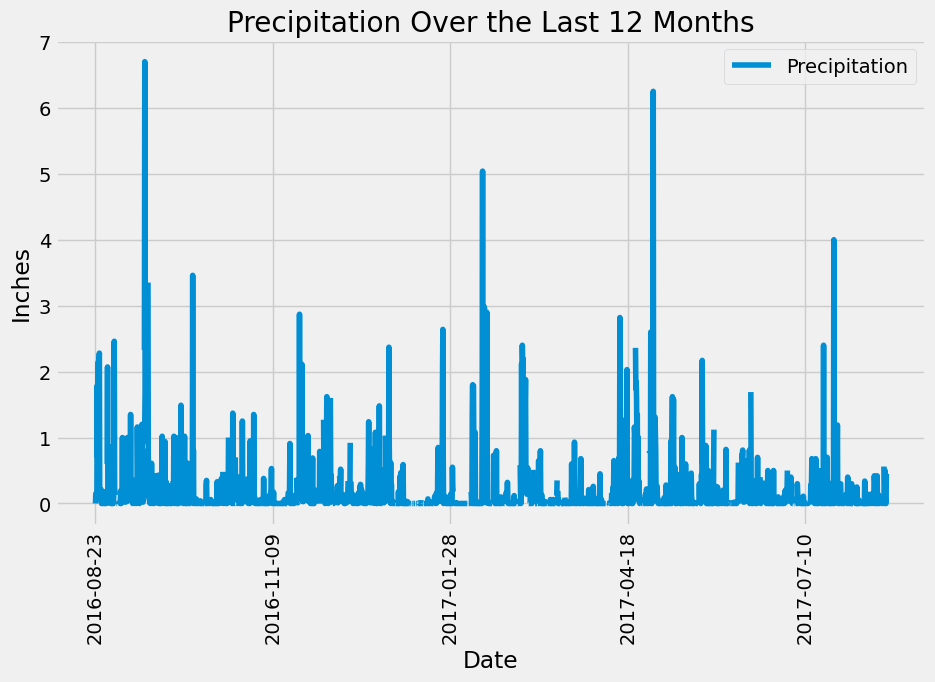

In [50]:
# Plotting the data
precipitation_df.plot('Date', 'Precipitation', figsize=(10, 6), rot=90, title='Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.show()


In [51]:
# Find the most recent date in the data set
# Design a query to retrieve the last 12 months of precipitation data from Measurements
# and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate the summary statistics for the precipitation data
summary_statistics_prcp = precipitation_df['Precipitation'].describe()

# Display the summary statistics
# print(summary_statistics_prcp)
summary_statistics_prcp

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Stations.id).count()
total_stations

9

In [54]:
# Design a query to find the most active stations
# List the stations and observation counts in descending order
most_active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()

# Display the results
most_active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, 
# calculate the lowest, highest, and average temperature.

# Get the most active station id
most_active_station_id = most_active_stations[0][0]

# Calculate the lowest, highest, and average temperature of the most active station
temperature_stats = session.query(
    func.min(Measurements.tobs),
    func.max(Measurements.tobs),
    func.avg(Measurements.tobs)
).filter(Measurements.station == most_active_station_id).all()

# Extract the results
lowest_temp, highest_temp, average_temp = temperature_stats[0]
most_active_station_id, temperature_stats



('USC00519281', [(54.0, 85.0, 71.66378066378067)])

In [56]:
tobs_data = session.query(Measurements.tobs).\
    filter(Measurements.station == most_active_station_id).\
    filter(Measurements.date >= one_year_ago).all()

tobs_values = [temp[0] for temp in tobs_data]

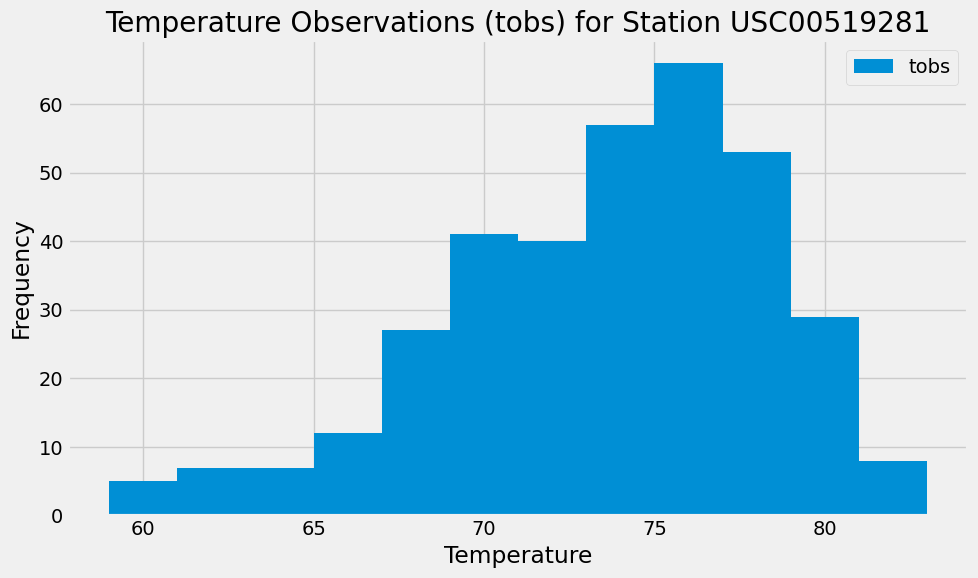

In [57]:

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(tobs_values, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.title(f"Temperature Observations (tobs) for Station {most_active_station_id}")
plt.tight_layout()
plt.show()


# Close Session

In [58]:
# Close Session
session.close()